In [ ]:
# Team 3
# Anirban Mukherjee
# Manjusha Chava
# Tae Hyun Je  
# DATE

In [6]:
# importing comms libraries
import numpy as np
import scipy as spy
import scipy.interpolate
import matplotlib.pyplot as plt
import math

In [12]:
# Define parameters for Project3
L = 100  # Length of the overall transmission
N = 10   # Pulse duration for rectangular pulse train
M = 10   # Upsampling factor for generating analog waveform
L_lc = 20 # Line coding pulse duration

In [13]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

In [14]:
# Matlab's quantiz function
def quantize(signal, partitions, codebook):
    indices = []
    quanta = []
    for datum in signal:
        index = 0
        while index < len(partitions) and datum > partitions[index]:
            index += 1
        indices.append(index)
        quanta.append(codebook[index])
    return indices, quanta

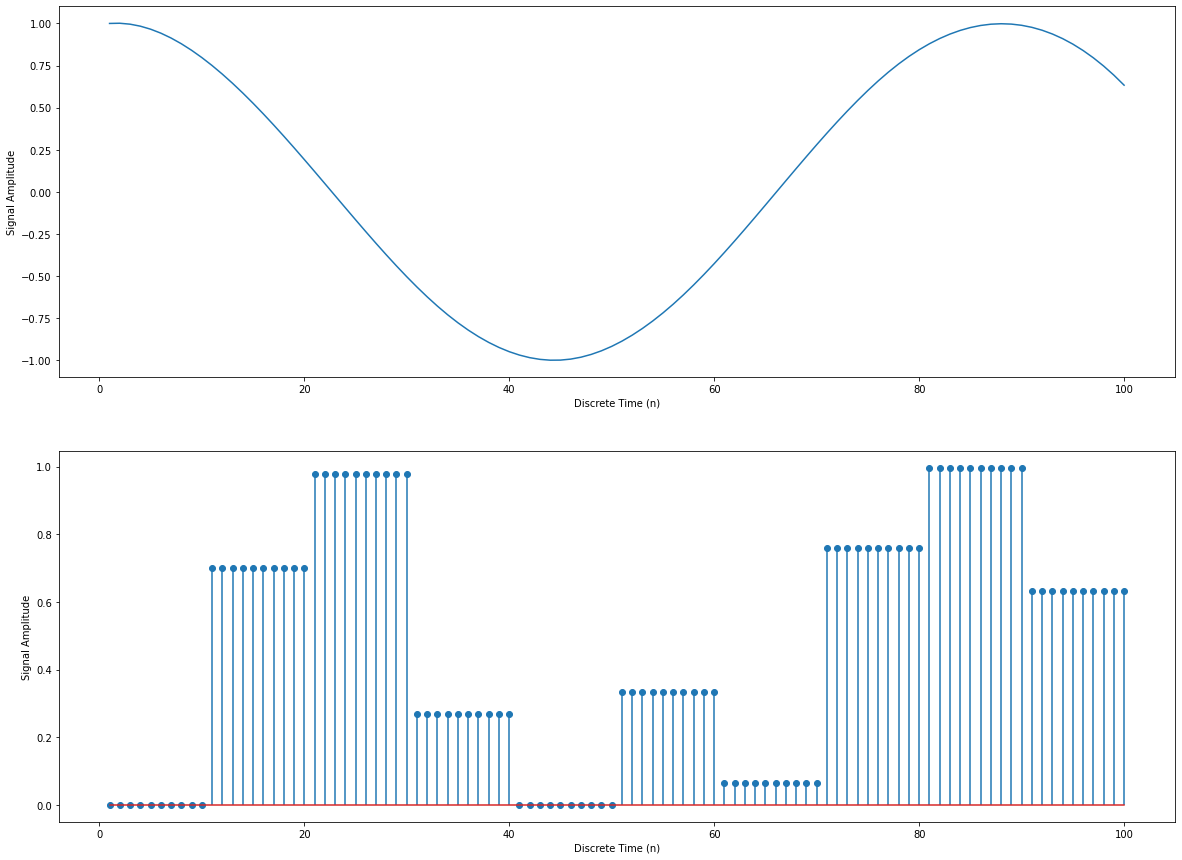

In [143]:
# Question 1

freq1 = 150
freq2 = 500
freq3 = 44100

cos1 = []
cos2 = []
cos3 = []

for i in range(N): 
    cos1.append(np.cos(freq1 * i))
    cos2.append(np.cos(freq2 * i))
    cos3.append(np.cos(freq3 * i))

analog_wavefm_50 = interpolate_1d_vector(cos1,N) 
analog_wavefm_500 = interpolate_1d_vector(cos2,N) 
analog_wavefm_44100 = interpolate_1d_vector(cos3,N) 

# Generate a rectangular pulse train of samples
impulsetrain_wavefm = np.reshape(np.ones((N,1))*np.remainder(cos1,1),(1,L), order='F')

impulsetrain_wavefm_500 = np.reshape(np.ones((N,1))*np.remainder(cos2,1),(1,L), order='F')

impulsetrain_wavefm_44100 = np.reshape(np.ones((N,1))*np.remainder(cos2,1),(1,L), order='F')

# Visualize

plt.figure(figsize=(20, 15))

plt.subplot(211)
plt.plot(np.arange(1,L+1),analog_wavefm_50)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.subplot(212)
plt.stem(np.arange(1,L+1),impulsetrain_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()


# plt.subplot(211)
# plt.plot(np.arange(1,L+1), analog_wavefm_500)
# plt.xlabel('Discrete Time (n)')
# plt.ylabel('Signal Amplitude')

# plt.subplot(211)
# plt.plot(np.arange(1,L+1), analog_wavefm_44100)
# plt.xlabel('Discrete Time (n)')
# plt.ylabel('Signal Amplitude')
# plt.show()


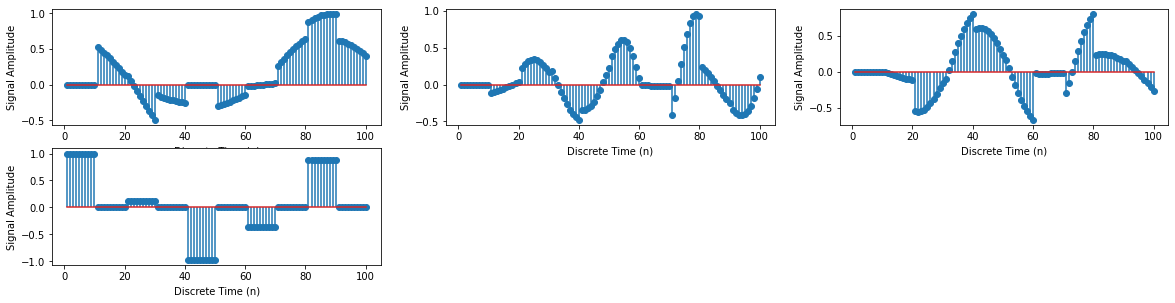

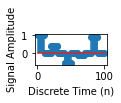

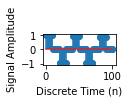

In [157]:
# Question 2
# Pulse Amplitude Modulation 


# Natural Sampling PAM
nspam_wavefm_150 = np.multiply(impulsetrain_wavefm, analog_wavefm_50).T

nspam_wavefm_500 = np.multiply(impulsetrain_wavefm_500, analog_wavefm_500).T

nspam_wavefm_44100 = np.multiply(impulsetrain_wavefm_44100, analog_wavefm_44100).T

# Flat-Top PAM

#downsampling
temp1 = analog_wavefm_50[0::2*N]
temp_500_1 = analog_wavefm_500[0::2*N]
temp_44100_1 = analog_wavefm_44100[0::2*N]

# variables for upsampling
temp2 = (int)(N/2)
temp3 = N

# upsampling for 150 Hz
temp = np.zeros((temp3,))
temp[::2] = temp1

# upsampling for 500 Hz
temp_500 = np.zeros((temp3,))
temp_500[::2] = temp_500_1

# upsampling for 44100 Hz
temp_44100 = np.zeros((temp3,))
temp_44100[::2] = temp_44100_1

# pam_wavefm for 150 Hz
ftpam_wavefm = np.reshape(np.ones((N,1))*temp,(1,L), order='F')

# pam_wavefm for 500 Hz
ftpam_wavefm_500 = np.reshape(np.ones((N,1))*temp_500,(1,L), order='F')

# pam_wavefm for 44100 Hz
ftpam_wavefm_44100 = np.reshape(np.ones((N,1))*temp_44100,(1,L), order='F')


# Visualize

plt.figure(figsize=(20, 15))

plt.subplot(631)
plt.stem(np.arange(1,L+1),nspam_wavefm_150)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')

plt.subplot(632)
plt.stem(np.arange(1,L+1),nspam_wavefm_500)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')

plt.subplot(633)
plt.stem(np.arange(1,L+1),nspam_wavefm_44100)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')


plt.subplot(634)
plt.stem(np.arange(1,L+1),ftpam_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

plt.subplot(641)
plt.stem(np.arange(1,L+1),ftpam_wavefm_500.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

plt.subplot(642)
plt.stem(np.arange(1,L+1),ftpam_wavefm_44100.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()




In [ ]:
# Question 3

# Create PCM waveform and its corresponding error waveform 50Hz
[ind_50,quantv_50] = quantize(analog_wavefm_50[0::N],[-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8],[-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9])
pcm_wavefm_50 = np.reshape(np.ones((N,1))*quantv_50,[1,L], order='F')
pcm_err_wavefm_50 = analog_wavefm_50 - pcm_wavefm_50

# Create PCM waveform and its corresponding error waveform 50Hz
[ind_500,quantv_500] = quantize(analog_wavefm_500[0::N],[-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8],[-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9])
pcm_wavefm_500 = np.reshape(np.ones((N,1))*quantv_500,[1,L], order='F')
pcm_err_wavefm_500 = analog_wavefm_500 - pcm_wavefm_500


# Create PCM waveform and its corresponding error waveform 50Hz
[ind_44100,quantv_44100] = quantize(analog_wavefm_44100[0::N],[-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8],[-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9])
pcm_wavefm_44100 = np.reshape(np.ones((N,1))*quantv_44100,[1,L], order='F')
pcm_err_wavefm_44100 = analog_wavefm_44100 - pcm_wavefm_44100


# Visualize
plt.figure(figsize=(15, 9))


plt.subplot(211)
plt.stem(np.arange(1,L+1),pcm_wavefm_50.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude');
plt.subplot(212)
plt.stem(np.arange(1,L+1),pcm_err_wavefm_50.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()


# Visualize
plt.figure(figsize=(15, 9))

plt.subplot(211)
plt.stem(np.arange(1,L+1),pcm_wavefm_500.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude');
plt.subplot(212)
plt.stem(np.arange(1,L+1),pcm_err_wavefm_500.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

# Visualize
plt.figure(figsize=(15, 9))

plt.subplot(211)
plt.stem(np.arange(1,L+1),pcm_wavefm_44100.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude');
plt.subplot(212)
plt.stem(np.arange(1,L+1),pcm_err_wavefm_44100.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()
